In [1]:
import numpy as np
import math as mth
import scipy.io as spio
from sklearn import preprocessing
import os
import matplotlib.pyplot as plt
import pylab

In [2]:
mat = spio.loadmat('79.mat')
data = np.array(mat['d79'], dtype='float64')

In [3]:
y=np.ones(2000,dtype=int)
y[0:1000]=-1
y[1000:2000]=1

In [4]:
data_scaled = preprocessing.scale(data)
s = np.arange(data_scaled.shape[0])
np.random.shuffle(s)

data_scaled_shuffle=data_scaled[s]
output_shuffle=y[s]


final_penalty=0.0001
final_sigma2=100000 
mat1 = spio.loadmat('test79.mat')
data_test = np.array(mat1['d79'], dtype='float64')
data_test_scaled = preprocessing.scale(data_test)

In [5]:
covData = np.cov(data_scaled_shuffle.T)

In [6]:
eigenvalues, eigenvectors = np.linalg.eig(covData)

In [7]:
print(eigenvectors)

[[ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  0.+0.j]
 ..., 
 [ 0.+0.j  0.+0.j  0.+0.j ...,  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  1.+0.j]]


In [8]:
x= [n for n in range (-2,3)]
y=  [eigenvectors[1][0]*i/eigenvectors[0][0] for i in x ] 
y1=  [eigenvectors[1][1]*i/eigenvectors[0][1] for i in x ] 

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in cdouble_scalars
  
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in cdouble_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


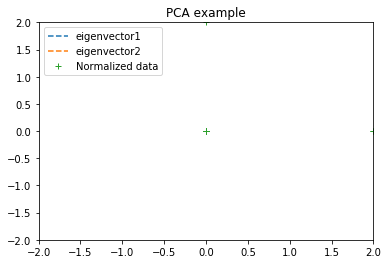

In [9]:
plt.plot(x, y,linestyle='--', label='eigenvector1')
plt.plot(x, y1, linestyle='--', label='eigenvector2')
plt.plot(data[0,:],data[1,:], marker='+', linestyle=' ',  label= "Normalized data" )
pylab.ylim([-2,2])
pylab.xlim([-2,2])
plt.title('PCA example')
plt.legend()
plt.show()

In [11]:
np.array(eigenvectors[1]).shape

(784,)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


(28, 28)


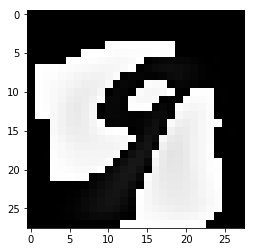

In [30]:
x = eigenvectors[:,0]*255.0
x.reshape(28,28)
x = np.array(x, dtype='uint8').reshape(28,28)
print(x.shape)
plt.imshow(x, cmap='gray')
plt.show()